In [2]:
## 
import json
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib as mpl
import numpy as np
import networkx as nx
import scipy as sp
from scipy.optimize import leastsq
import sys
import random
datapath = "F:\\master\\myWork\\19encounterModel\\data\\"
#%pylab inline

In [8]:
qtconsole

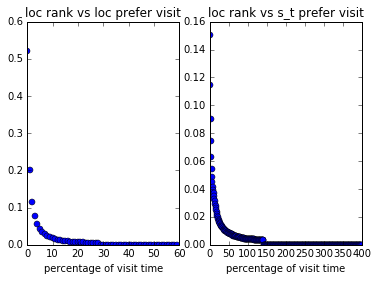

In [48]:
## individual visit rate for different rank of lacations/spatio-temporal slot
dataset = "fdu2009"
loc_rate = json.load(open(datapath+"%s//sptiotemporalPre//user_loc_rate.json"%dataset))

plt.subplot(1,2,1)
locN = 60
temp = np.zeros(locN)
locn = zeros(locN)
for ki in loc_rate:
    rank = loc_rate[ki]["loc"]
    for i in range(len(rank)):
        temp[i] += rank[i]
        locn[i] += 1
for i in range(len(temp)):
    if locn[i] > 0:
        temp[i] = temp[i]/float(locn[i])
plt.plot(range(locN), temp, "o")
plt.title("loc rank vs loc prefer visit")
plt.xlabel("loc rank")
plt.ylabel("percentage of visit time")

plt.subplot(1,2,2)
locN = 400
temp = np.zeros(locN)
locn = zeros(locN)
for ki in loc_rate:
    rank = loc_rate[ki]["s_t"]
    for i in range(len(rank)):
        temp[i] += rank[i]
        locn[i] += 1
for i in range(len(temp)):
    if locn[i] > 0:
        temp[i] = temp[i]/float(locn[i])
plot(range(locN), temp, "o")
plt.title("loc rank vs s_t prefer visit")
plt.xlabel("s_t rank")
plt.ylabel("percentage of visit time")
plt.show()

loc: 968
s_t: 19875


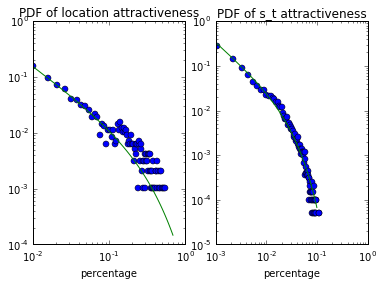

In [99]:
## attractiveness of each loc/s_t
dataset = "fdu2013"
loc_attra = json.load(open(datapath+"%s//sptiotemporalPre//loc_attra.json"%dataset))
minloca = 0.01
minsta = 0.001
subplot(1,2,1)
data = [x for x in loc_attra["loc"].values() if x >=minloca]
print "loc:",len(data)
weights = np.ones_like(data)/len(data)
n,bins = np.histogram(data, bins = 100, weights = weights)
plt.loglog(bins[0:-1],n,"o")

lambd =1.0
beta = 0.04
x=np.arange(1,70,1)
y = 0.16*(x**(-1*lambd))*np.exp(-1*beta*x)
plt.loglog(x/100.0,y,"-")

plt.title("PDF of location attractiveness")
plt.xlabel("location attractiveness")
plt.xlabel("percentage")

subplot(1,2,2)
data = [x for x in loc_attra["s_t"].values() if x >=minsta]
print "s_t:",len(data)
weights = np.ones_like(data)/len(data)
n,bins = np.histogram(data, bins = 100, weights = weights)
plt.loglog(bins[0:-1],n,"o")

lambd =1.0
beta = 0.04
x=np.arange(1,100,1)
y = 0.35*(x**(-1*lambd))*np.exp(-1*beta*x)
plt.loglog(x/1000.0,y,"-")

plt.title("PDF of s_t attractiveness")
plt.xlabel("s_t attractiveness")
plt.xlabel("percentage")
plt.show()

3.2099827883


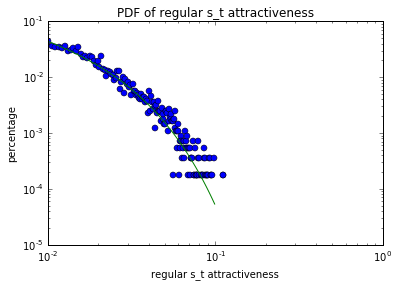

In [120]:
## attractiveness of each regular s_t
dataset = "fdu2013"
LN = 83
T = 21
minsta = 0.01
loc_attra_reg = json.load(open(datapath+"%s//sptiotemporalPre//loc_attra_reg.json"%dataset))

data = loc_attra_reg["s_t"].values()
data = [x for x in loc_attra["s_t"].values() if x >=minsta]
weights = np.ones_like(data)/len(data)
n,bins = np.histogram(data, bins = 200, weights = weights)
print len(data)/float(LN*T)
plt.semilogy(bins[0:-1],n,"o")

lambd =0.6
beta = 0.6
x=np.arange(1,10,0.1)
y = 0.08*(x**(-1*lambd))*np.exp(-1*beta*x)
plt.loglog(x/100.0,y,"-")

plt.title("PDF of regular s_t attractiveness")
plt.xlabel("regular s_t attractiveness")
plt.ylabel("percentage")
plt.show()

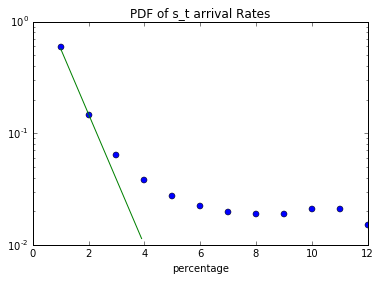

In [19]:
## s_t arrival Rates
dataset = "fdu2013"
data = json.load(open(datapath+"%s//sptiotemporalPre//s_t_arrivalRate.json"%dataset))
weights = np.ones_like(data)/float(len(data))
n,bins = np.histogram(data,bins =range(0,14), weights = weights)
plt.semilogy(bins[0:-1],n,"o")

lambd =2
x=np.arange(1,4,0.1)
y = 2.2*np.exp(-1.35*x)
plt.semilogy(x,y,"-")

plt.title("PDF of s_t arrival Rates")
plt.xlabel("s_t arrival Rates")
plt.xlabel("percentage")
plt.show()

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000


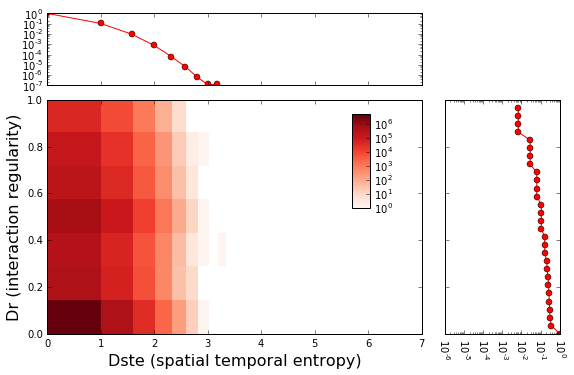

In [124]:
# draw e-r distribution
dataset = "fdu2013"
modelname = 13
eList = []
rList = []
fr = open(datapath+"%s//modelResult//%s//stat//dyad_e_r_t_l.txt"%(dataset, modelname))
line = fr.readline().replace("\n","")
count = 0
while line:
    count += 1
    if count%1000000 == 0:
        print count
    ei = float(line.split("\t")[1])
    ri = float(line.split("\t")[2])
    eList.append(round(ei, 3))
    rList.append(round(ri, 7))
    line = fr.readline().replace("\n","")
fr.close()

xmin = min(eList)
xmax = max(eList)
ymin = min(rList)
ymax = max(rList)

fig = plt.figure(figsize=(8,5))
nullfmt   = NullFormatter() 
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left+width+0.04
x_bins = np.round(np.log2(np.array(range(1,64))),3)
# x_bins = range(1,64)
y_bins = np.linspace(0,1,8)
x_bins0 = np.round(np.log2(np.array(range(1,64))),3)
y_bins0 = np.linspace(0,1,30)
rect_heatmap= [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]
axheatmap = plt.axes(rect_heatmap)

axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)
[a,b,c,d] = axheatmap.hist2d(eList, rList, bins = [x_bins, y_bins], range = [[0, 7], [0, 1]],norm=LogNorm(),cmap='Reds')
cbaxis = fig.add_axes([left+0.53, bottom+0.35, 0.03, height*0.4])
plt.colorbar(d,cax = cbaxis)
binwidth = 0.25
binwidth2 = 0.01
xymax = np.max( [np.max(np.fabs(eList)), np.max(np.fabs(rList))] )
lim = ( int(xymax/binwidth) + 1) * binwidth
axheatmap.set_xlim( (0, 7) )
axheatmap.set_ylim( (0, 1) )
axheatmap.set_xlabel("Dste (spatial temporal entropy)", fontsize=16)
axheatmap.set_ylabel("Dr (interaction regularity)",fontsize=16)
bins1 = np.arange(0, lim + binwidth, binwidth)
bins2 = np.arange(0, lim + binwidth2, binwidth2)
weights1 = np.ones_like(eList)/float(len(eList)) 
weights2 = np.ones_like(rList)/float(len(rList)) 

nx,binsx = np.histogram(eList,bins=x_bins,weights = weights1)
xx = list(nx)
xx.reverse()
xx = list(np.cumsum(xx))
xx.reverse()
axHistx.semilogy(binsx[:-1],xx,'-ro',label="empiral data")
axHistx.set_xlim((0, 7))

axHisty.set_xticklabels(axHisty.xaxis.get_ticklabels(),rotation = -90 )
ny,binsy = np.histogram(rList,bins=y_bins0,weights = weights2)
yy = list(ny)
yy.reverse()
yy = list(np.cumsum(yy))
yy.reverse()
axHisty.semilogx(yy,binsy[:-1],'-ro',label="empiral data")
axHisty.set_xlim(1e-6,1)
plt.show()

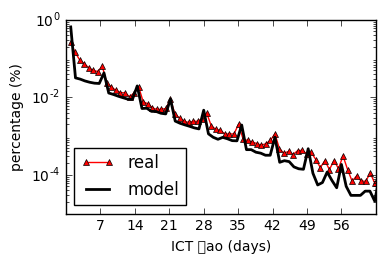

In [3]:
## draw ICT_all
datapath19 = "F:\\master\\myWork\\19encounterModel\\data\\"
datapath18 = "F:\\master\\myWork\\18familiarStrangers\\data\\"
dataset = "fdu2009"
tp = "ir"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}

e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]

ICT_model = []
ICT_real = []

fr = open(datapath19 + "%s\\statResult\\%s_ICT_all.txt"%(dataset, tp))
line = fr.readline().replace("\n","")
while line:
    dyadID, icts = line.split("\t")
    if icts == "":
        line = fr.readline().replace("\n","")
        continue
    icts = icts.split(",")
    for x in icts:
        ICT_model.append((int(x)-1)*10/60)
    line = fr.readline().replace("\n","")
fr.close()

fr = open(datapath18 +"%s\\ICT\\%.3f_%.3f_slot.txt"%(dataset, e0, r0))
lines = fr.read().splitlines()
count = 0
for e in lines:
    count += 1
    if count%1000000==0:
        print count
    splits = e.split("\t")
    if splits[1] == tp:
        ICT_real.append(int(splits[0]))
fr.close()

fig = plt.figure(figsize=(4,2.5))

weight = np.ones_like(ICT_real)/float(len(ICT_real))
[n,bins] = np.histogram(ICT_real, bins = 84, weights = weight)
plt.semilogy(bins[1:],n,"r-^",label="real",markersize=5)

weight = np.ones_like(ICT_model)/float(len(ICT_model))
[n,bins] = np.histogram(ICT_model, bins = 84, weights = weight)
plt.semilogy(bins[1:],n,"k-",label="model",markersize=3, linewidth=2)

labels = ['7','14','21','28','35','42','49','56']
plt.xticks(range(168,2160,168), labels)
plt.xlabel("ICT  (days)")
plt.xlim(0,9*168+1)
plt.ylim(1e-5,1)
plt.yticks([1e-4,1e-2,1])
plt.legend(loc="lower left")
plt.ylabel("percentage (%)")
plt.show()

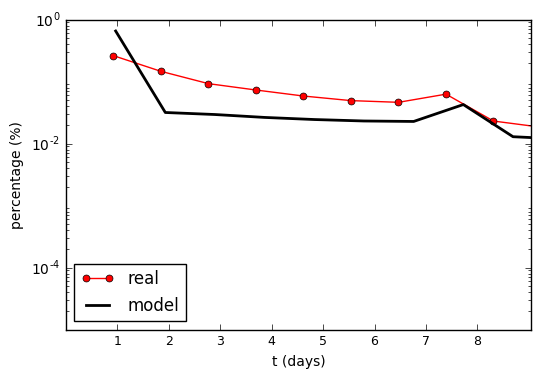

In [6]:
## draw ICT_all (T=24h)
datapath19 = "F:\\master\\myWork\\19encounterModel\\data\\"
datapath18 = "F:\\master\\myWork\\18familiarStrangers\\data\\"
dataset = "fdu2009"
tp = "ir"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}

e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]

ICT_model = []
ICT_real = []

fr = open(datapath19 + "%s\\statResult\\%s_ICT_all.txt"%(dataset, tp))
line = fr.readline().replace("\n","")
while line:
    dyadID, icts = line.split("\t")
    if icts == "":
        line = fr.readline().replace("\n","")
        continue
    icts = icts.split(",")
    for x in icts:
        ICT_model.append((int(x)-1)*10/60)
    line = fr.readline().replace("\n","")
fr.close()

fr = open(datapath18 +"%s\\ICT\\%.3f_%.3f_slot.txt"%(dataset, e0, r0))
lines = fr.read().splitlines()
count = 0
for e in lines:
    count += 1
    if count%1000000==0:
        print count
    splits = e.split("\t")
    if splits[1] == tp:
        ICT_real.append(int(splits[0]))
fr.close()

weight = np.ones_like(ICT_real)/float(len(ICT_real))
[n,bins] = np.histogram(ICT_real, bins = 84, weights = weight)
plt.semilogy(bins[1:],n,"ro-",label="real",markersize=5)

weight = np.ones_like(ICT_model)/float(len(ICT_model))
[n,bins] = np.histogram(ICT_model, bins = 84, weights = weight)
plt.semilogy(bins[1:],n,"k-",label="model",markersize=3, linewidth=2)

labels = ['1','2','3','4','5','6','7','8']
plt.xticks(range(24,9*24,24), labels, fontsize=9)
plt.xlabel("t (days)")
plt.xlim(0,9*24+1)
plt.ylim(1e-5,1)
plt.yticks([1e-4,1e-2,1])
plt.legend(loc="lower left")
plt.ylabel("percentage (%)")
plt.show()

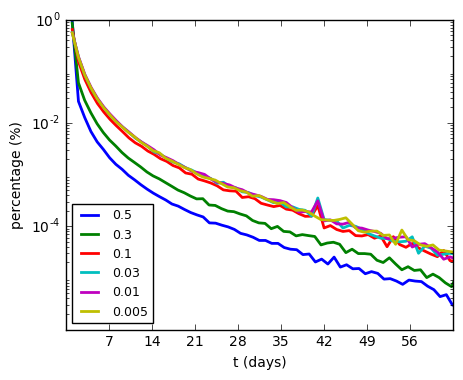

In [5]:
## draw ICT_all (T=7d) for different paras
datapath19 = "F:\\master\\myWork\\19encounterModel\\data\\"
dataset = "fdu2009"
tp = "f"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}

e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
# files = ["Pr_09","Pr_07","Pr_05","Pr_03","Pr_01"]
files = ["Pc_5","Pc_3","Pc_1","Pc_03","Pc_01","Pc_005"]
# files = ["Pc_8","Pc_5","Pc_3","Pc_1","Pc_05"]
# plabel = ["0.9","0.7","0.5","0.3","0.1"]
plabel = ["0.5","0.3","0.1","0.03","0.01","0.005"]
# plabel = ["0.8","0.5","0.3","0.1","0.05"]

c = 0
plt.figure(figsize=(5,4))
for fi in files:
    c += 1
    ICT_model = []
    fr = open(datapath19 + "%s\\statResult\\%s_ICT_all_%s.txt"%(dataset, tp, fi))
    line = fr.readline().replace("\n","")
    while line:
        dyadID, icts = line.split("\t")
        if icts == "":
            line = fr.readline().replace("\n","")
            continue
        icts = icts.split(",")
        for x in icts:
            ICT_model.append((int(x)-1)*10/60)
        line = fr.readline().replace("\n","")
    fr.close()

    weight = np.ones_like(ICT_model)/float(len(ICT_model))
    [n,bins] = np.histogram(ICT_model, bins = 81, weights = weight)
    plt.semilogy(bins[1:],n,label=plabel[c-1],markersize=3, linewidth=2)

labels = ['7','14','21','28','35','42','49','56']
plt.xticks(range(168,2160,168), labels)
plt.xlabel("t (days)")
plt.xlim(0,9*168+1)
plt.ylim(1e-6,1)
plt.yticks([1e-4,1e-2,1])
plt.legend(loc="lower left", fontsize=9)
plt.ylabel("percentage (%)")
plt.show()

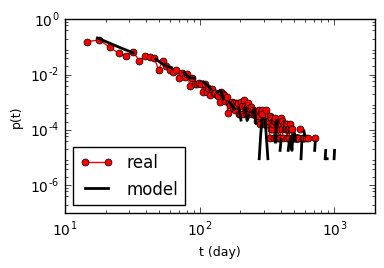

In [4]:
# draw ICT_withinaday
datapath19 = "F:\\master\\myWork\\19encounterModel\\data\\"
datapath18 = "F:\\master\\myWork\\18familiarStrangers\\data\\"
dataset = "fdu2009"
tp = "fs"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}

e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]

ICT_model = []
ICT_real = []

fr = open(datapath19 + "%s\\statResult\\%s_ICT_withinaday.txt"%(dataset, tp))
line = fr.readline().replace("\n","")
while line:
    dyadID, icts = line.split("\t")
    if icts == "":
        line = fr.readline().replace("\n","")
        continue
    icts = icts.split(",")
    for x in icts:
        ICT_model.append((int(x)-1)*10)
    line = fr.readline().replace("\n","")
fr.close()

fr = open(datapath18 +"%s\\ICT\\%.3f_%.3f_withinaday.txt"%(dataset, e0, r0))
lines = fr.read().splitlines()
count = 0
for e in lines:
    count += 1
    if count%1000000==0:
        print count
    splits = e.split("\t")
    if splits[1] == tp:
        ICT_real.append(int(splits[0]))
fr.close()
fig = plt.figure(figsize=(4,2.5)) #正文0.8

weight = np.ones_like(ICT_real)/float(len(ICT_real))
[n,bins] = np.histogram(ICT_real, bins = 200, weights = weight)
plt.loglog(bins[1:],n,"ro-",label="real",markersize=5)

weight = np.ones_like(ICT_model)/float(len(ICT_model))
[n,bins] = np.histogram(ICT_model, bins =150, weights = weight)
plt.loglog(bins[1:],n*0.5,"k-",label="model",markersize=3, linewidth=2)

plt.ylim(1e-7,1)
plt.yticks([1e-6,1e-4,1e-2,1])
plt.xlim(10,2000)
plt.xticks([10,100,1000])
plt.xlabel("t (day)", fontsize=9)
plt.ylabel("p(t)",fontsize=9)
plt.legend(loc="lower left")
plt.show()

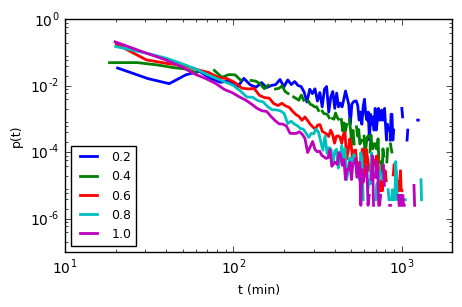

In [3]:
# draw ICT_withinaday for different paras
datapath19 = "F:\\master\\myWork\\19encounterModel\\data\\"
dataset = "fdu2009"
tp = "fs"
er = {"fdu2013":{"e0":2.000,"r0":0.106},
      "fdu2014":{"e0":2.000,"r0":0.0834083},
      "fdu2009":{"e0":1.585,"r0":0.069507},
      "usc2006":{"e0":2.322,"r0":0.0119012}}

e0 = er[dataset]["e0"]
r0 = er[dataset]["r0"]
plt.figure(figsize=(5,3))
files = ["Pa_2","Pa_4","Pa_6","Pa_8","Pa_10"]
plabel = ["0.2","0.4","0.6","0.8","1.0"]
c = 0
for fi in files:
    ICT_model = []
    c += 1
    fr = open(datapath19 + "%s\\statResult\\%s_ICT_withinaday_%s.txt"%(dataset, tp, fi))
    line = fr.readline().replace("\n","")
    while line:
        dyadID, icts = line.split("\t")
        if icts == "":
            line = fr.readline().replace("\n","")
            continue
        icts = icts.split(",")
        for x in icts:
            ICT_model.append((int(x)-1)*10)
        line = fr.readline().replace("\n","")
    fr.close()

    weight = np.ones_like(ICT_model)/float(len(ICT_model))
    [n,bins] = np.histogram(ICT_model, bins =130, weights = weight)
    plt.loglog(bins[1:],n*0.5,label=plabel[c-1],markersize=3, linewidth=2)

plt.ylim(1e-7,1)
plt.yticks([1e-6,1e-4,1e-2,1])
plt.xlim(10,2000)
plt.xticks([10,100,1000])
plt.xlabel("t (min)", fontsize=9)
plt.ylabel("p(t)",fontsize=9)
plt.legend(loc="lower left", fontsize=9)
plt.show()